<a href="https://colab.research.google.com/github/thiagomvdev/tmvdev/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



In [4]:
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
faturamento_loja = sum(loja["Preço"])
faturamento_loja2 = sum(loja2["Preço"])
faturamento_loja3 = sum(loja3["Preço"])
faturamento_loja4 = sum(loja4["Preço"])

In [6]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento_lojas = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

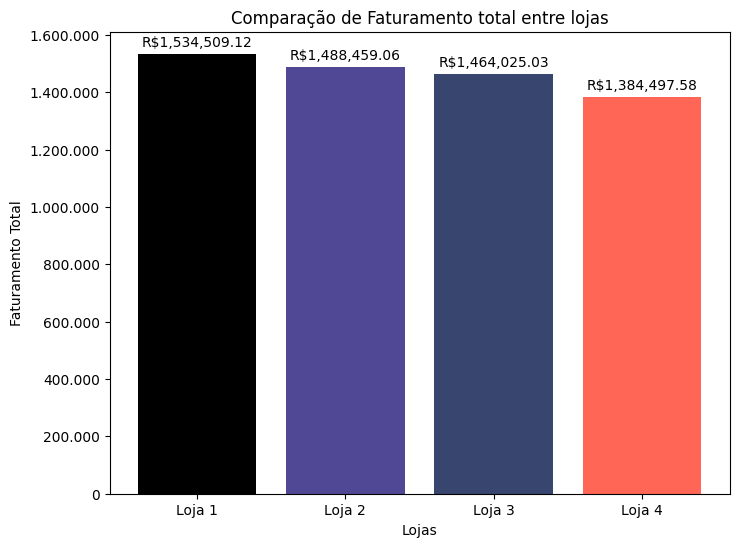

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(lojas, faturamento_lojas, color=["#000000", "#504895", "#38456f", "#ff6655"])
for i, valor in enumerate(faturamento_lojas):
        plt.text(i, valor + (valor * 0.01), f'R${valor:,.2f}', ha='center', va='bottom')
plt.xticks(lojas)
plt.ylabel("Faturamento Total")
plt.xlabel("Lojas")
plt.title("Comparação de Faturamento total entre lojas")
formatar_valores_faturamento = FuncFormatter(lambda valor, pos: f'{int(valor):,}'.replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatar_valores_faturamento)

plt.show()

# 2. Vendas por Categoria


In [8]:
import pandas as pd
categorias_lojas = pd.concat([loja["Categoria do Produto"], loja2["Categoria do Produto"], loja3["Categoria do Produto"], loja4["Categoria do Produto"]])
categorias_existentes = categorias_lojas.unique()

In [9]:
def contar_qntd_vendas_categorias(loja):
    categorias_e_qntd_vendas = {}
    for categoria in categorias_existentes:
        total_vendas_categorias = loja[loja["Categoria do Produto"] == categoria]["Categoria do Produto"].count()
        categorias_e_qntd_vendas[categoria] = int(total_vendas_categorias)
    return categorias_e_qntd_vendas

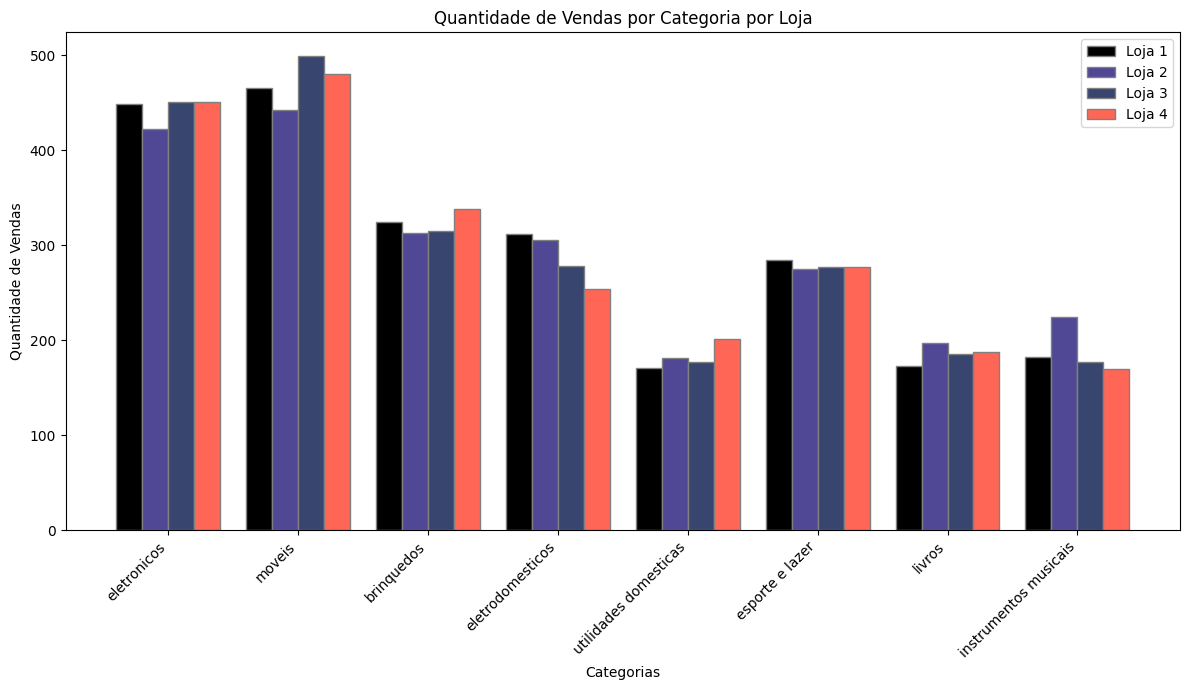

In [10]:
qntd_vendas_categorias_loja = contar_qntd_vendas_categorias(loja)
qntd_vendas_categorias_loja2 = contar_qntd_vendas_categorias(loja2)
qntd_vendas_categorias_loja3 = contar_qntd_vendas_categorias(loja3)
qntd_vendas_categorias_loja4 = contar_qntd_vendas_categorias(loja4)

valores_loja1 = [qntd_vendas_categorias_loja.get(categoria) for categoria in categorias_existentes]
valores_loja2 = [qntd_vendas_categorias_loja2.get(categoria) for categoria in categorias_existentes]
valores_loja3 = [qntd_vendas_categorias_loja3.get(categoria) for categoria in categorias_existentes]
valores_loja4 = [qntd_vendas_categorias_loja4.get(categoria) for categoria in categorias_existentes]

bar_width = 0.2
r1 = np.arange(len(categorias_existentes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(12, 7))

plt.bar(r1, valores_loja1, color='#000000', width=bar_width, edgecolor='grey', label='Loja 1')
plt.bar(r2, valores_loja2, color='#504895', width=bar_width, edgecolor='grey', label='Loja 2')
plt.bar(r3, valores_loja3, color='#38456f', width=bar_width, edgecolor='grey', label='Loja 3')
plt.bar(r4, valores_loja4, color='#ff6655', width=bar_width, edgecolor='grey', label='Loja 4')

plt.xlabel('Categorias')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas por Categoria por Loja')
plt.xticks([r + 1.5 * bar_width for r in range(len(categorias_existentes))], categorias_existentes, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [11]:
def calcular_media_avaliacao_geral(loja):
    soma_avaliacoes = 0
    qntd_avaliacoes = 0
    for avaliacao in loja["Avaliação da compra"]:
        soma_avaliacoes += avaliacao
        qntd_avaliacoes += 1
    media_avaliacao = soma_avaliacoes / qntd_avaliacoes
    media_avaliacao = round(media_avaliacao, 2)
    return media_avaliacao

In [12]:
avaliacao_loja = calcular_media_avaliacao_geral(loja)
avaliacao_loja2 = calcular_media_avaliacao_geral(loja2)
avaliacao_loja3 = calcular_media_avaliacao_geral(loja3)
avaliacao_loja4 = calcular_media_avaliacao_geral(loja4)

avaliacoes_lojas = [avaliacao_loja, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]

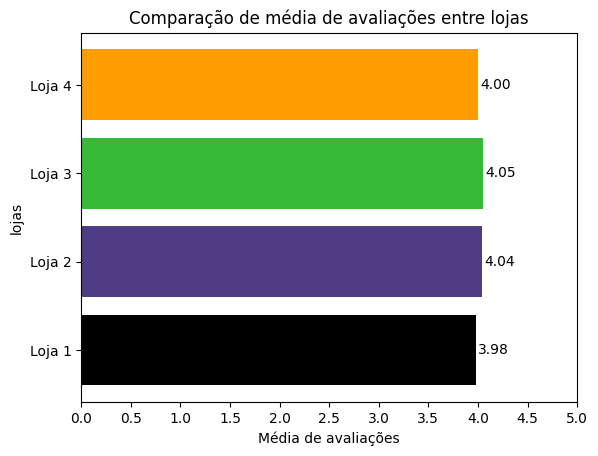

Loja 1 = Média de 3.98
Loja 2 = Média de 4.04
Loja 3 = Média de 4.05
Loja 4 = Média de 4.0


In [13]:
for i, valor in enumerate(avaliacoes_lojas):
    plt.xlim(0, 5)
    plt.xticks(np.arange(0, 5.5, 0.5))
    plt.text(valor + 0.02, i, f"{valor:.2f}", va='center', color='black', fontsize=10)
plt.barh(lojas, avaliacoes_lojas, color=["000000", "#503c84", "#37ba38", "#fe9d00"])
plt.ylabel("lojas")
plt.xlabel("Média de avaliações")
plt.title("Comparação de média de avaliações entre lojas")
plt.show()

for i, avaliacao in enumerate(avaliacoes_lojas):
    print(f"Loja {i+1} = Média de {avaliacao}")

# 4. Produtos Mais e Menos Vendidos

In [14]:
def filtrar_produto_mais_e_menos_vendidos(loja):
	produto_mais_vendido = loja["Produto"].value_counts().idxmax()
	qntd_produto_mais_vendido = loja["Produto"].value_counts().max()


	produto_menos_vendido = loja["Produto"].value_counts().idxmin()
	qntd_produto_menos_vendido = loja["Produto"].value_counts().min()
	return (produto_mais_vendido, qntd_produto_mais_vendido, produto_menos_vendido, qntd_produto_menos_vendido)

In [15]:
produto_mais_vendido_loja, qntd_produto_mais_vendido, produto_menos_vendido_loja, qntd_produto_menos_vendido = filtrar_produto_mais_e_menos_vendidos(loja)
produto_mais_vendido_loja2, qntd_produto_mais_vendido2, produto_menos_vendido_loja2, qntd_produto_menos_vendido2 = filtrar_produto_mais_e_menos_vendidos(loja2)
produto_mais_vendido_loja3, qntd_produto_mais_vendido3, produto_menos_vendido_loja3, qntd_produto_menos_vendido3 = filtrar_produto_mais_e_menos_vendidos(loja3)
produto_mais_vendido_loja4, qntd_produto_mais_vendido4, produto_menos_vendido_loja4, qntd_produto_menos_vendido4 = filtrar_produto_mais_e_menos_vendidos(loja4)

produtos_mais_vendidos = [produto_mais_vendido_loja, produto_mais_vendido_loja2, produto_mais_vendido_loja3, produto_mais_vendido_loja4]
qtds_mais_vendidos = [qntd_produto_mais_vendido, qntd_produto_mais_vendido2, qntd_produto_mais_vendido3, qntd_produto_menos_vendido4]
produtos_menos_vendidos = [produto_menos_vendido_loja, produto_menos_vendido_loja2, produto_menos_vendido_loja3, produto_menos_vendido_loja4]
qtds_menos_vendidos = [qntd_produto_menos_vendido, qntd_produto_menos_vendido2, qntd_produto_menos_vendido3, qntd_produto_menos_vendido4]

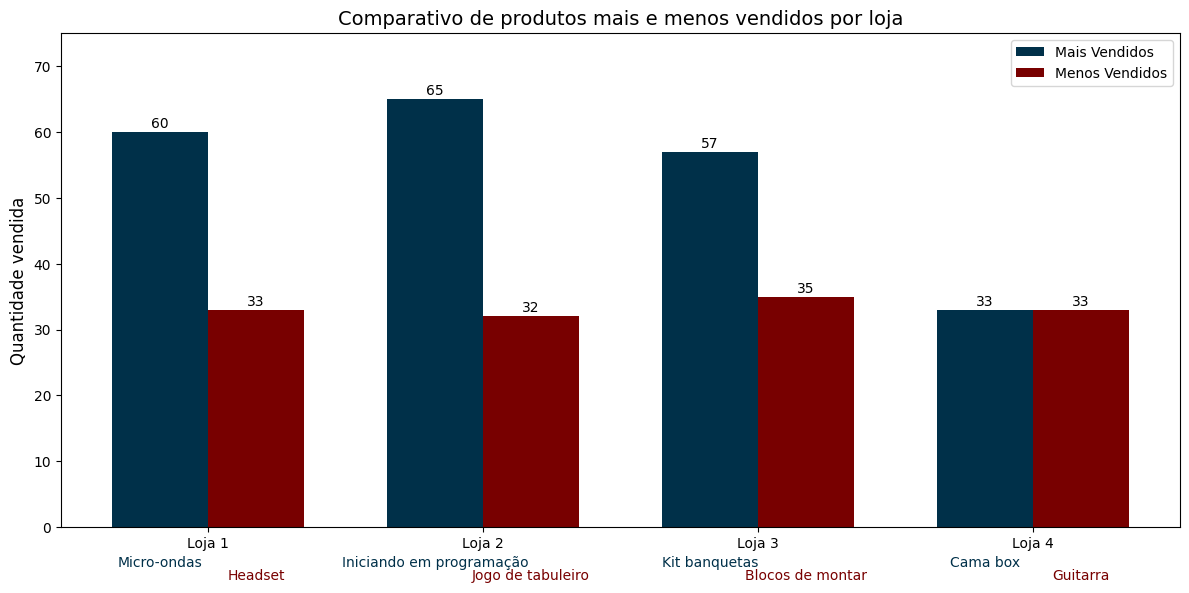

In [16]:
x = np.arange(len(lojas))
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0, 75)
barras_mais = ax.bar(x - 0.35/2, qtds_mais_vendidos, 0.35, label='Mais Vendidos', color='#003049')
barras_menos = ax.bar(x + 0.35/2, qtds_menos_vendidos, 0.35, label='Menos Vendidos', color='#780000')
ax.bar_label(barras_mais, labels=qtds_mais_vendidos, fontsize=10, label_type='edge', padding=1)
ax.bar_label(barras_menos, labels=qtds_menos_vendidos, fontsize=10, label_type='edge', padding=1)
for i, barra in enumerate(barras_mais):
        ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() - barra.get_height() - 6, produtos_mais_vendidos[i], fontsize=10, color='#003049', ha='center')
for i, barra in enumerate(barras_menos):
        ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() - barra.get_height() - 8, produtos_menos_vendidos[i], fontsize=10, color='#780000', ha='center')
ax.set_title("Comparativo de produtos mais e menos vendidos por loja", fontsize=14)
ax.set_ylabel("Quantidade vendida", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.legend()
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [17]:
def calcular_frete_medio(loja):
	total = 0
	pedidos = []
	for frete in loja["Frete"]:
		pedidos.append(frete)
		total += frete
	frete_medio = round((total / len (pedidos)), 2)
	return frete_medio

In [18]:
frete_loja = calcular_frete_medio(loja)
frete_loja2 = calcular_frete_medio(loja2)
frete_loja3 = calcular_frete_medio(loja3)
frete_loja4 = calcular_frete_medio(loja4)

frete_lojas = [frete_loja, frete_loja2, frete_loja3, frete_loja4]

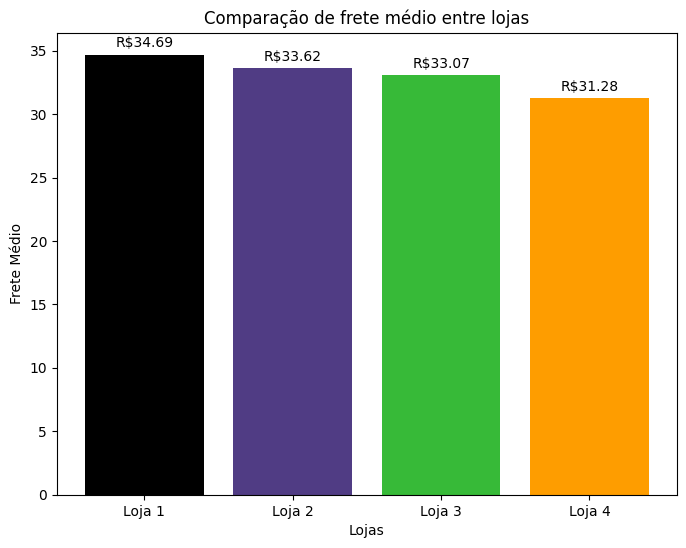

In [20]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8., 6))
plt.bar(lojas, frete_lojas, color=["#000000", "#503c84", "#37ba38", "#fe9d00"])
plt.xticks(lojas)
plt.ylabel("Frete Médio")
plt.xlabel("Lojas")
plt.title("Comparação de frete médio entre lojas")
for i, valor in enumerate(frete_lojas):
        plt.text(i, valor + (valor * 0.01), f'R${valor:,.2f}', ha='center', va='bottom')
formatar_valores_faturamento = FuncFormatter(lambda valor, pos: f'{int(valor):,}'.replace(",", "."))
plt.gca().yaxis.set_major_formatter(formatar_valores_faturamento)
plt.show()